In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data-salary.txt')

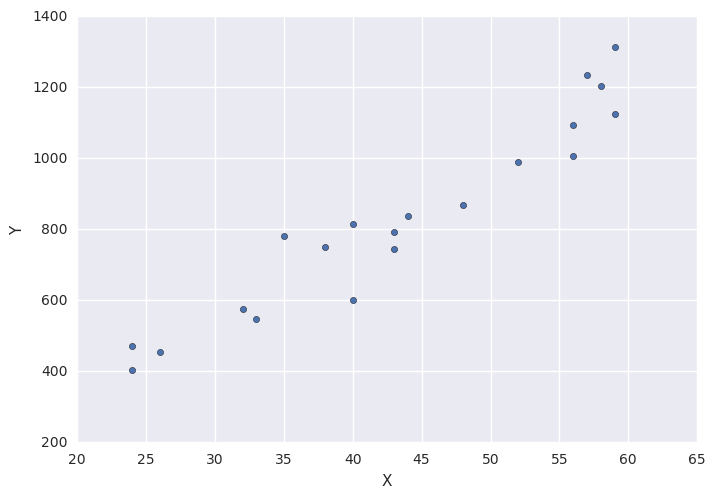

In [3]:
df.plot.scatter('X', 'Y')

(23, 60)

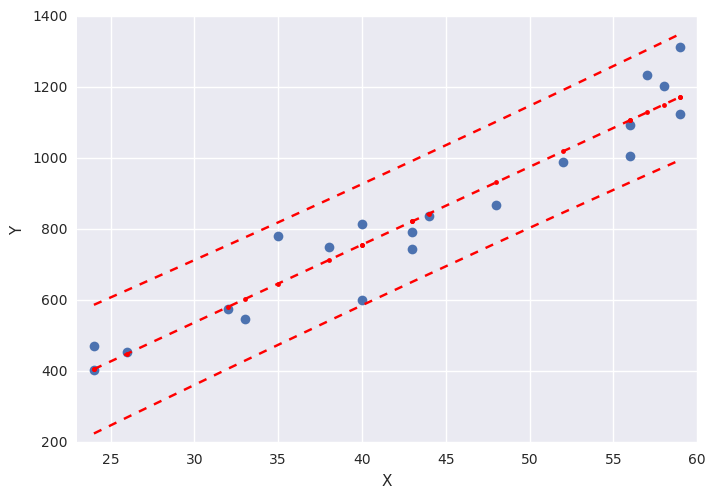

In [4]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

x = df['X']
y = df['Y']
model = sm.OLS(y, sm.add_constant(x))
res = model.fit()
res.summary()
prstd, iv_l, iv_u = wls_prediction_std(res, alpha=0.05)
plt.plot(x, y, 'o')
plt.plot(x, res.fittedvalues, 'r--.')
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(23,60)

In [6]:
import pystan
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    stanmodel = pystan.StanModel(file='./model4-5.stan')

In [9]:
data = {
    'X': df['X'],
    'Y': df['Y'],
    'N': df['X'].shape[0],
}
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit = stanmodel.sampling(
        data=data,
        seed=0,
    )
    
fit

Inference for Stan model: anon_model_a5383320e5d818d976e59523c8e84c3c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -119.8    2.82  74.38 -263.4 -168.5 -119.2 -69.88  21.76    698   1.01
b      21.91    0.06   1.66  18.66  20.81  21.91  22.98  25.16    700   1.01
sigma  84.84    0.55  14.87  61.26  74.24  82.99  92.96 119.69    725    1.0
lp__  -93.64    0.05   1.31 -97.08 -94.25 -93.29 -92.69 -92.15    628   1.01

Samples were drawn using NUTS(diag_e) at Mon Nov 14 23:06:51 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

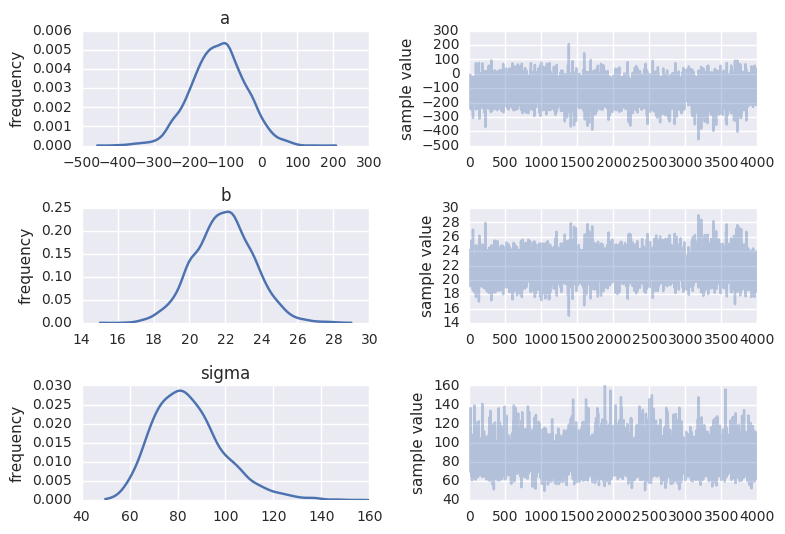

In [10]:
fit.plot()
plt.tight_layout()

In [11]:
samples = fit.extract()
np.percentile(samples['b'], q=[2.5, 97.5])

array([ 18.66393559,  25.15142819])